In [1]:
# by: Joao Roque
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
survey = pd.read_csv('../../data/survey.csv')
#survey['Profile'] = survey['Profile'].astype('category')

survey.head()

,Meetup #,City,Venue,Date,Profile,Motivation - Get in touch with companies,Motivation - Be part of the community,Motivation - Learn Techniques,Motivation - Drinking beers,Motivation - Meet Speakers,Motivation - Learn Technologies,Motivation - Discuss approaches/problems,Motivation - Other,Suggestions - workshops and meetups topics,Suggestions - Other,How was the meetup
0,15.0,Braga,Subvisual,18/10/2017,Professional,-,-,2,-,-,1,3,-,-,-,Good
1,15.0,Braga,Subvisual,18/10/2017,Interested,3,7,2,4,6,1,5,-,-,-,Good
2,15.0,Braga,Subvisual,18/10/2017,Interested,5,2,3,-,-,1,4,-,-,-,Good
3,15.0,Braga,Subvisual,18/10/2017,Interested,6,4,1,7,5,2,3,-,"Present real world scenarios, and also speak i...","for beginners, it could be interesting to talk...",Good
4,15.0,Braga,Subvisual,18/10/2017,Student,-,-,X,-,-,X,X,-,Processamento de Linguagem Natural,-,Good


## Cleaning and Viz functions

In [3]:
pd.options.mode.chained_assignment = None 

# Lot's of invalid answers ( 996 --> less than 200)
beer_survey = survey[survey['Motivation - Drinking beers'].astype(str).str.isdigit()]
beer_survey['Motivation - Drinking beers'] = [int(x) for x in beer_survey['Motivation - Drinking beers']]

# input: give me that dataframe
# rotate = True allows to ratate xlabels 90 degrees
def hor_box(data, x, y, rotate = False):
    plt.figure()
    plt.xlim(0,10)
    g = sns.boxplot(x = x, y = y, data = data, palette="vlag")
    sns.swarmplot(x = x, y = y, data = data, size=2, color=".3", linewidth=1)
    sns.despine(trim=True, left=True)
    
    if rotate:
        g.set_xticklabels(g.get_xticklabels(), rotation=90)

beer_survey.head()

,Meetup #,City,Venue,Date,Profile,Motivation - Get in touch with companies,Motivation - Be part of the community,Motivation - Learn Techniques,Motivation - Drinking beers,Motivation - Meet Speakers,Motivation - Learn Technologies,Motivation - Discuss approaches/problems,Motivation - Other,Suggestions - workshops and meetups topics,Suggestions - Other,How was the meetup
1,15.0,Braga,Subvisual,18/10/2017,Interested,3,7,2,4,6,1,5,-,-,-,Good
3,15.0,Braga,Subvisual,18/10/2017,Interested,6,4,1,7,5,2,3,-,"Present real world scenarios, and also speak i...","for beginners, it could be interesting to talk...",Good
5,15.0,Braga,Subvisual,18/10/2017,Interested,5,3,2,7,6,1,4,-,"Deep Learning, Computer Vision, Higher Educati...",-,Good
6,15.0,Braga,Subvisual,18/10/2017,Interested,3,4,2,7,6,1,5,-,-,-,Good
8,15.0,Braga,Subvisual,18/10/2017,Student,6,5,2,7,4,1,3,-,Explora and compare different ML libraries,-,Good


## Let's start with the real questions here (The Beer)

1. How does beer drinking motivation go along the year?

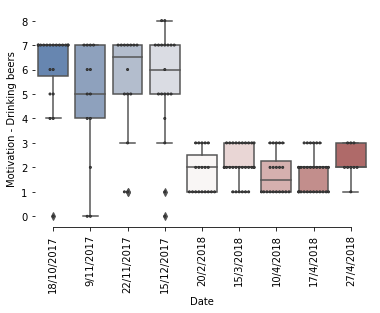

In [4]:
x = 'Motivation - Drinking beers'
y = "Date"
rotate = True
# (Probably not the best way to vizualise this, but let's just take a quick look)
hor_box(beer_survey, y, x, rotate = True)

This is rather odd... Seems like a whole new audience has joined over the last year!  
Or, you know... the scales are different...  
Even though the max value in 2018 is 3, I still think the scale is from 1 to 5 (I've been told previously this might have happened). Let's take a look!

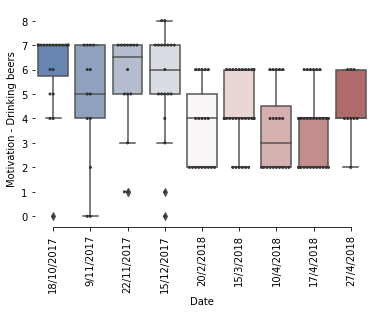

In [5]:
for index, row in beer_survey.iterrows():
    if row['Date'].split('/')[2] == "2018":
        beer_survey.at[index, 'Motivation - Drinking beers'] = beer_survey.at[index, 'Motivation - Drinking beers'] * 2
        
y = "Date"
rotate = True
hor_box(beer_survey, y, x, rotate = True)

A bit more leveled, but still odd...  anyway, let's move on.     
2 . Who are the groups most interested in drinking beer?

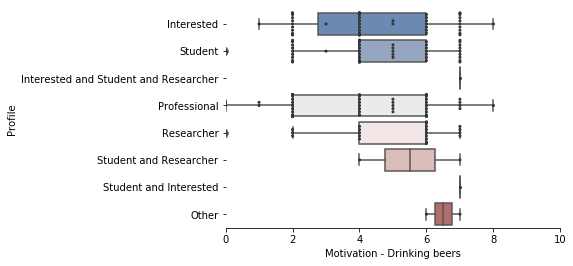

In [6]:
x =  "Motivation - Drinking beers"
y = "Profile"
hor_box(beer_survey, x, y)

Some classes are really underrepresented here. Let's just remove them ¯\\_(ツ)_/¯

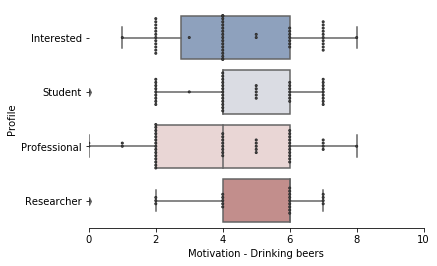

In [7]:
beer_survey_profile = beer_survey.loc[beer_survey['Profile'].isin(['Interested', 'Professional', 'Researcher', 'Student'])]

y = 'Profile'
hor_box(beer_survey_profile, x, y)

Turns out no one wants to admit their 10/10 alchool problem.  
3 . But, are there more drinkers in any given city?

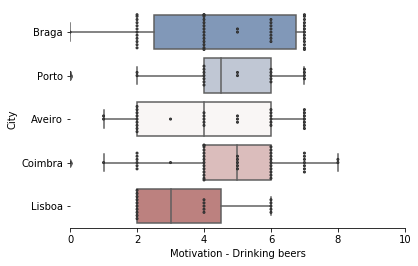

In [8]:
y = "City"
hor_box(beer_survey, x, y)

Coimbra with the highest average and outliers... What a surprise!  

So, it looks as the beer drinking interest has gone down a bit over the last year...  
4 . Maybe there are more members of some specific groups? We can start by comparing classes count before and after 2018

In [25]:
# easier format to plot with sns
group_count = pd.DataFrame(columns = ['Profile','Year'])
survey['Date'] = survey['Date'].astype(str)
survey_profile = survey.loc[survey['Profile'].isin(['Interested', 'Professional', 'Researcher', 'Student'])]

count = 0
year_2017 = 0
year_2018 = 0

for index, row in survey.iterrows():
    try:
        if row['Date'].split('/')[2] == "2018":
            group_count.loc[count] = [survey.loc[index, 'Profile'], '2018'] 
            year_2017 += 1
            count += 1
        elif row['Date'].split('/')[2] == "2017":
            group_count.loc[count] = [survey.loc[index, 'Profile'], '2017']
            year_2018 += 1
            count += 1
            
    except Exception as e:
        # All exceptions return a nan profile
        #print(str(e) + ' in ' + row['Date'])
        pass

group_count.head()

,Profile,Year
0,Professional,2017
1,Interested,2017
2,Interested,2017
3,Interested,2017
4,Student,2017


This data shows a 6.2992125984252% decrease of participants bu an overall increase of Professionals and Students!


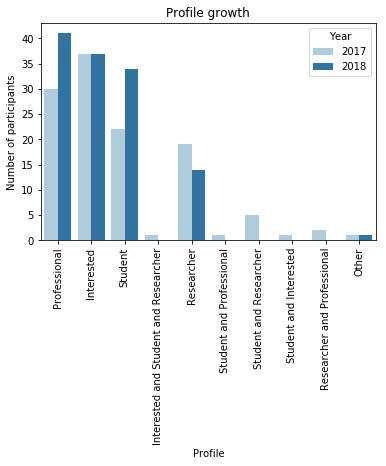

In [34]:
plt.figure()
current_palette_7 = sns.color_palette("Paired")
sns.set_palette(current_palette_7)
plot = sns.countplot(x = 'Profile', hue = 'Year', data = group_count)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylabel('Number of participants')
plt.title('Profile growth')

print('This data shows a ' + str(100 - (year_2018 * 100 )/year_2017) + '% decrease of participants\
 bu an overall increase of Professionals and Students!')

5 . But, how was the meetup though?

Text(0.5,1,'How was the meetup?')

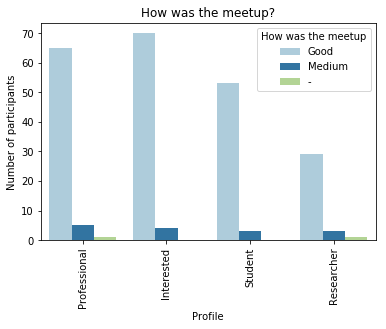

In [33]:
plt.figure()
current_palette_7 = sns.color_palette("Paired")
sns.set_palette(current_palette_7)
plot = sns.countplot(x = 'Profile', hue = 'How was the meetup', data = survey_profile)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylabel('Number of participants')
plt.title('How was the meetup?')

Pretty good!